In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [208]:
df=pd.read_csv("train_file.csv")

In [209]:
df.head()

,patient_id,time,dos,hatype,age,airq,medication,headache,sex
0,1,-7.0,757.0,Aura,30.0,18.0,continuing,yes,female
1,2,-11.0,753.0,Aura,30.0,9.0,continuing,yes,female
2,3,-6.0,758.0,Aura,30.0,19.0,continuing,yes,female
3,4,29.0,793.0,Aura,30.0,21.0,continuing,yes,female
4,5,22.0,786.0,Aura,30.0,21.0,continuing,yes,female


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   patient_id  2906 non-null   int64  
 1   time        2899 non-null   float64
 2   dos         2901 non-null   float64
 3   hatype      2906 non-null   object 
 4   age         2898 non-null   float64
 5   airq        2905 non-null   float64
 6   medication  2890 non-null   object 
 7   headache    2905 non-null   object 
 8   sex         2906 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 204.5+ KB


In [211]:
df.describe(include="all")

,patient_id,time,dos,hatype,age,airq,medication,headache,sex
count,2906.000000,2899.000000,2901.000000,2906,2898.000000,2905.000000,2890,2905,2906
unique,NaN,NaN,NaN,2,NaN,NaN,3,2,2
top,NaN,NaN,NaN,No Aura,NaN,NaN,continuing,yes,female
freq,NaN,NaN,NaN,1704,NaN,NaN,1674,1863,2481
mean,1453.500000,15.442221,646.442606,NaN,42.525190,24.942169,NaN,NaN,NaN
std,839.034266,21.744637,334.124044,NaN,11.163403,9.532746,NaN,NaN,NaN
min,1.000000,-29.000000,98.000000,NaN,18.000000,6.000000,NaN,NaN,NaN
25%,727.250000,4.000000,389.000000,NaN,33.000000,18.000000,NaN,NaN,NaN
50%,1453.500000,12.000000,622.000000,NaN,45.000000,24.000000,NaN,NaN,NaN
75%,2179.750000,24.000000,951.000000,NaN,51.000000,29.000000,NaN,NaN,NaN


In [212]:
df.isnull().sum()

patient_id     0
time           7
dos            5
hatype         0
age            8
airq           1
medication    16
headache       1
sex            0
dtype: int64

In [213]:
df[df['time'].isnull()==True]

,patient_id,time,dos,hatype,age,airq,medication,headache,sex
208,209,NaN,NaN,Aura,42.0,24.0,continuing,no,female
321,322,NaN,193.0,Aura,47.0,24.8,continuing,yes,female
526,527,NaN,305.0,No Aura,33.0,16.0,reduced,yes,female
1748,1749,NaN,742.0,Aura,46.0,17.0,continuing,yes,female
1772,1773,NaN,749.0,Aura,46.0,12.0,continuing,no,female
1777,1778,NaN,743.0,Aura,46.0,25.0,continuing,yes,female
2614,2615,NaN,1045.0,No Aura,52.0,24.8,continuing,no,female


In [214]:
df['time'].fillna(df['time'].median(), inplace=True)

In [215]:
df['dos'].fillna(df['dos'].median(), inplace=True)

In [216]:
df['age'].fillna(df['age'].median(), inplace=True)

In [217]:
df['airq'].fillna(df['airq'].median(), inplace=True)

In [218]:
df['medication'].fillna(df['medication'].mode(), inplace=True)

In [219]:
df['headache'].fillna(df['headache'].mode(), inplace=True)

In [220]:
df[df['time'].isnull()==True]

,patient_id,time,dos,hatype,age,airq,medication,headache,sex


In [221]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 0


,patient_id,time,dos,hatype,age,airq,medication,headache,sex


In [222]:
df['airq'].value_counts(normalize=True)

24.8    0.073985
18.0    0.063317
20.0    0.056435
25.0    0.048864
14.0    0.046800
          ...   
63.0    0.000688
57.0    0.000344
73.0    0.000344
60.0    0.000344
62.0    0.000344
Name: airq, Length: 61, dtype: float64

In [223]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: hatype
[Aura, No Aura]
Categories (2, object): [Aura, No Aura]
[0 1]


feature: medication
[continuing, reduced, none, NaN]
Categories (3, object): [continuing, none, reduced]
[ 0  2  1 -1]


feature: headache
[yes, no, NaN]
Categories (2, object): [no, yes]
[ 1  0 -1]


feature: sex
[female, male]
Categories (2, object): [female, male]
[0 1]


In [224]:
df.hatype.value_counts(normalize=True)

1    0.586373
0    0.413627
Name: hatype, dtype: float64

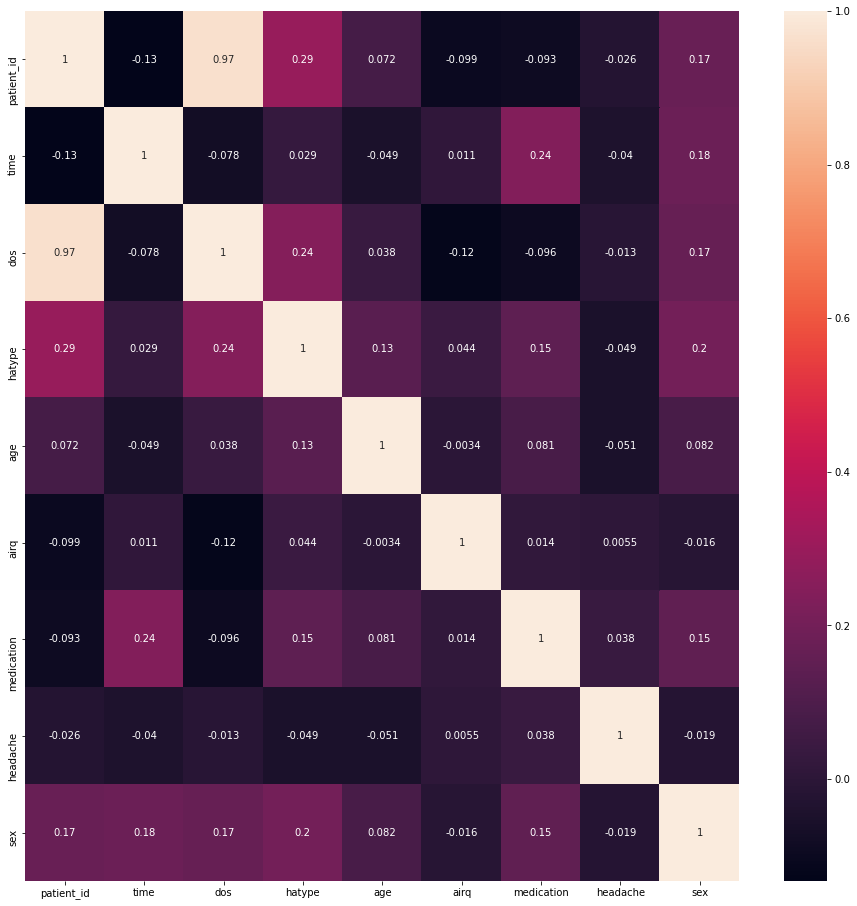

In [225]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(), annot=True)

In [226]:
df.drop("patient_id",axis=1)

,time,dos,hatype,age,airq,medication,headache,sex
0,-7.0,757.0,0,30.0,18.0,0,1,0
1,-11.0,753.0,0,30.0,9.0,0,1,0
2,-6.0,758.0,0,30.0,19.0,0,1,0
3,29.0,793.0,0,30.0,21.0,0,1,0
4,22.0,786.0,0,30.0,21.0,0,1,0
...,...,...,...,...,...,...,...,...
2901,27.0,1215.0,0,26.0,20.0,0,1,1
2902,37.0,1225.0,0,26.0,22.0,0,1,1
2903,24.0,1212.0,0,26.0,27.0,0,1,1
2904,46.0,1234.0,0,26.0,28.0,0,0,1


In [227]:
X=df.drop("hatype",axis=1)
y=df.pop("hatype")

In [228]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.25, random_state=0)

In [229]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (2179, 8)
X_test (727, 8)
train_labels (2179,)
test_labels (727,)


In [234]:
param_grid = {
    'max_depth': [20,30,40],
    'max_features': [2,4,6],
    'min_samples_leaf': [2,3,4],
    'min_samples_split': [5,10,15],
    'n_estimators': [200]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [235]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [20, 30, 40], 'max_features': [2, 4, 6],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [200]})

In [236]:
grid_search.best_params_

{'max_depth': 40,
 'max_features': 6,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 200}

In [237]:
best_grid = grid_search.best_estimator_

In [238]:
best_grid

RandomForestClassifier(max_depth=40, max_features=6, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=200)

In [239]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)


In [240]:
confusion_matrix(train_labels,ytrain_predict)

array([[ 913,    1],
       [   0, 1265]], dtype=int64)

In [241]:
rf_train_acc=best_grid.score(X_train,train_labels) 
rf_train_acc

0.9995410738871042

In [242]:
rf_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][1],2)
rf_train_recall=round(df.loc["1"][2],2)
rf_train_f1=round(df.loc["1"][0],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  1.0
rf_train_recall  1.0
rf_train_f1  1.0


Area under Curve is 0.99945295404814


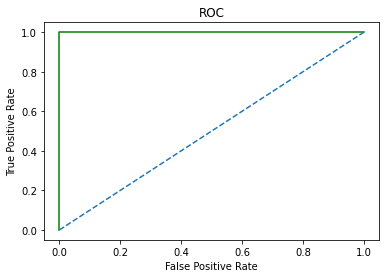

In [243]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid.predict(X_train))
print('Area under Curve is', rf_train_auc)

In [244]:
confusion_matrix(test_labels,ytest_predict)

array([[287,   1],
       [  0, 439]], dtype=int64)

In [245]:
rf_test_acc=best_grid.score(X_test,test_labels)
rf_test_acc

0.9986244841815681

In [246]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       288
           1       1.00      1.00      1.00       439

    accuracy                           1.00       727
   macro avg       1.00      1.00      1.00       727
weighted avg       1.00      1.00      1.00       727



In [247]:
rf_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][1],2)
rf_test_recall=round(df.loc["1"][2],2)
rf_test_f1=round(df.loc["1"][0],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  1.0
rf_test_recall  1.0
rf_test_f1  1.0


Area under Curve is 0.998263888888889


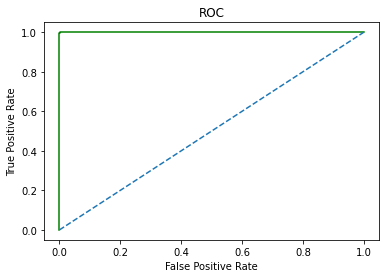

In [248]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid.predict(X_test))
print('Area under Curve is', rf_test_auc)

In [249]:
# Variable Importance
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                 Imp
patient_id  0.470565
age         0.222115
dos         0.192087
medication  0.049185
sex         0.037520
airq        0.012861
time        0.010969
headache    0.004697


In [250]:
df2=pd.read_csv("test_file.csv")
df2.drop("patient_id",axis=1)


,time,dos,age,airq,medication,headache,sex
0,23.0,262,54,20.0,continuing,yes,female
1,31.0,795,30,15.0,continuing,yes,female
2,28.0,792,30,22.0,continuing,no,female
3,26.0,790,30,12.0,continuing,yes,female
4,34.0,798,30,20.0,continuing,yes,female
...,...,...,...,...,...,...,...
1241,35.0,1223,26,24.0,continuing,yes,male
1242,43.0,1231,26,19.0,continuing,yes,male
1243,42.0,1230,26,20.0,continuing,no,male
1244,29.0,1217,26,25.0,continuing,yes,male


In [256]:
for feature in df2.columns: 
    if df2[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df2[feature].unique()))
        print(pd.Categorical(df2[feature].unique()).codes)
        df2[feature] = pd.Categorical(df2[feature]).codes



feature: medication
[continuing, reduced, none, NaN]
Categories (3, object): [continuing, none, reduced]
[ 0  2  1 -1]


feature: headache
[yes, no, NaN]
Categories (2, object): [no, yes]
[ 1  0 -1]


feature: sex
[female, male]
Categories (2, object): [female, male]
[0 1]


In [257]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   patient_id  1246 non-null   int64  
 1   time        1244 non-null   float64
 2   dos         1246 non-null   int64  
 3   age         1246 non-null   int64  
 4   airq        1246 non-null   float64
 5   medication  1246 non-null   int8   
 6   headache    1246 non-null   int8   
 7   sex         1246 non-null   int8   
dtypes: float64(2), int64(3), int8(3)
memory usage: 52.4 KB


In [264]:
df2.isnull().sum()

patient_id    0
time          2
dos           0
age           0
airq          0
medication    0
headache      0
sex           0
dtype: int64

In [265]:
df2[df2['time'].isnull()==True]

,patient_id,time,dos,age,airq,medication,headache,sex
727,728,NaN,748,46,14.0,0,1,0
734,735,NaN,744,46,31.0,0,1,0


In [266]:
df2['time'].fillna(df2['time'].median(), inplace=True)

In [267]:
prediction = best_grid.predict(df2)


In [272]:
prediction.T

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [276]:
#for i in range(1,1246):
#    printx= (i, prediction[i-1])

In [296]:
pat=[]
for i in range(1,1247):
    pat.append(i)

     


In [297]:
len(pat)

1246

In [298]:
len(prediction)

1246

In [299]:
# dictionary of lists   
dict = {'patient_id': pat, 'hatype': prediction }   
       
dfx = pd.DataFrame(dict)  
    
# saving the dataframe  
dfx.to_csv('test.csv')  

In [306]:
np.sqrt(1246)

35.298725189445584

# NEURAL NET

In [331]:
param_grid = {
    'hidden_layer_sizes': [90,100,110], #,50,200
    'max_iter': [10000,6000,8000], #5000,2500
    'solver': ['adam'], #sgd
    'tol': [0.00005], 
}

nncl = MLPClassifier()

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 10)

In [332]:
grid_search.fit(X_train, train_labels)
grid_search.best_params_
#{'hidden_layer_sizes': 100, 'max_iter': 7000, 'solver': 'adam', 'tol': 0.01}

{'hidden_layer_sizes': 90, 'max_iter': 10000, 'solver': 'adam', 'tol': 0.0001}

In [336]:
best_grid = grid_search.best_estimator_
best_grid

MLPClassifier(hidden_layer_sizes=90, max_iter=10000)

In [337]:
prediction_MLP = best_grid.predict(df2)

In [338]:
dict = {'patient_id': pat, 'hatype': prediction_MLP }   
       
dfx = pd.DataFrame(dict)  
    
# saving the dataframe  
dfx.to_csv('test_MLP.csv')  